## Exercise 10: IBM

This notebook is based on the example introduced in https://www.python-course.eu/k_nearest_neighbor_classifier.php

### Read the iris dataset

In [73]:
%matplotlib inline
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])
iris_data[1:10]

[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2


array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Creating a learnset and testset in relation 70:30

In [74]:
np.random.seed(0)
indices = np.random.permutation(len(iris_data))
n_training_samples = 45
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]] [2 1 0 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]] [0 0 0 1]


### Visualize data like introduced in example
The following code is only necessary to visualize the data of our learnset. Our data consists of for values per iris item, so we will reduce the data to three values by summing up the third and fourth value. This way, we are capable of depicting the data in 3-dimensional space:

105


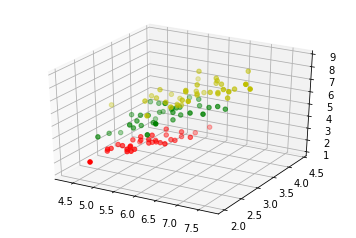

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
print(len(learnset_data))
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

### Introduce the distance function

In [77]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
5.463515351859094


### Introduce the get_neighbors()
The function 'get_neighbors returns a list with 'k' neighbors, which are closest to the instance 'test_instance':

In [78]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

### Introduce new iris data given by Edlich, calculate k with sqrt() and test get_neighbors()

In [79]:
new_iris_data = [4.8,2.5,5.3,2.4]
k_neighbors_learnset = int(round(np.sqrt(len(learnset_data))))

neighbors_learnset = get_neighbors(
    learnset_data,
    learnset_labels,
    newIrisData,
    k_neighbors_learnset,
    distance=distance)
print(neighbors_learnset)

[(array([5.6, 2.8, 4.9, 2. ]), 1.0246950765959593, 2), (array([5.7, 2.5, 5. , 2. ]), 1.0295630140987002, 2), (array([5.8, 2.8, 5.1, 2.4]), 1.0630145812734648, 2), (array([4.9, 2.5, 4.5, 1.7]), 1.067707825203131, 2), (array([5.8, 2.7, 5.1, 1.9]), 1.1532562594670797, 2), (array([5.9, 3. , 5.1, 1.8]), 1.363818169698586, 2), (array([5.4, 3. , 4.5, 1.5]), 1.4352700094407325, 1), (array([6. , 2.7, 5.1, 1.6]), 1.469693845669907, 1), (array([5.6, 3. , 4.5, 1.5]), 1.5297058540778352, 1), (array([6. , 2.2, 5. , 1.5]), 1.5588457268119895, 2)]


### Introduce voting()

In [80]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

### Run vote() on neighbors_learnset

In [81]:
voting = vote(neighbors_learnset)
print(voting)

2


### We got an Iris-Virginica type.
### Now test the result against the testset

In [82]:
k_neighbors_testset = int(round(np.sqrt(len(testset_data))))
neighbors_testset = get_neighbors(
    testset_data,
    testset_labels,
    newIrisData,
    k_neighbors_testset,
    distance=distance)
voting = vote(neighbors_testset)
print(voting)

2


### Still Iris-Virginica
### Introduce vote_prob() to make sure the result is trustable

Running the function against learnset and testset

In [83]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [84]:
voting_prob_learnset = vote_prob(neighbors_learnset)
voting_prob_testset = vote_prob(neighbors_testset)
print(voting_prob_learnset)
print(voting_prob_testset)

(2, 0.7)
(2, 0.7142857142857143)


### The result is to 70% accurate!
### Done!